# Naive Bayes

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Binarizer, OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import confusion_matrix

## Data Prep

In [30]:
RANDOM_STATE = 9

# Read in data
df = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv')
df = df.set_index('date')

# Create binary snow variable
df['Snow'] = np.where((df['WTEQ_BisonLake'] > 0) | (df['WTEQ_McClurePass'] > 0), 
                      1, 0)
series_pred = df['Snow']
df = df.drop(columns=['WTEQ_BisonLake', 'WTEQ_McClurePass'])

# Standardize for Gaussian Naive Bayes
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df.drop(columns=['Snow']))

# Discretize data for Multinomial Naive Bayes, Categorical Naive Bayes, and Bernoulli Naive Bayes
kbd = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform', 
                       subsample=200000)
X_bins = kbd.fit_transform(df.drop(columns=['Snow']))


# Split data
X_train_standardized, X_test_standardized, y_train, y_test = train_test_split(
    X_standardized, series_pred, test_size=0.2, random_state=RANDOM_STATE)
X_train_bins, X_test_bins, y_train_bins, y_test_bins = train_test_split(
    X_bins, series_pred, test_size=0.2, random_state=RANDOM_STATE)

In [31]:
# compare shapes
print('Standardized Data:')
print(f"{X_train_standardized.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test_standardized.shape = }")
print(f"{y_test.shape = }")
print('\nDiscretized Data:')
print(f"{X_train_bins.shape = }")
print(f"{X_test_bins.shape = }")
print(f"{y_train_bins.shape = }")
print(f"{y_test_bins.shape = }")

Standardized Data:
X_train_standardized.shape = (2396, 6)
y_train.shape = (2396,)
X_test_standardized.shape = (600, 6)
y_test.shape = (600,)

Discretized Data:
X_train_bins.shape = (2396, 6)
X_test_bins.shape = (600, 6)
y_train_bins.shape = (2396,)
y_test_bins.shape = (600,)


### Why do we perform train-test split?

A train-test split is essential in predictive modeling as it provides a structured method to assess model performance and minimize the risk of overfitting. Training a model on the entire dataset can lead to a situation where the model “memorizes” patterns specific to that dataset, which may not generalize well to new, unseen data. By setting aside a portion of data for testing, we ensure that the model is evaluated on a sample it has not encountered before, giving us a clearer indication of its ability to generalize. This process helps us detect when a model’s high accuracy is merely a result of fitting too closely to the training data, rather than an indicator of its predictive power on future data. Without a train-test split, it is challenging to identify if the model is genuinely effective or if it simply reflects patterns unique to the training set, which could lead to poor performance in real-world applications where data is often variable and unpredictable. Thus, the train-test split not only aids in validating the robustness of the model but also fosters more reliable predictions, ensuring that model performance metrics reflect its true capability.

## Gaussian Naive Bayes

Gaussian Model Accuracy: 0.9233333333333333

Confusion Matrix:
[[202  11]
 [ 35 352]]


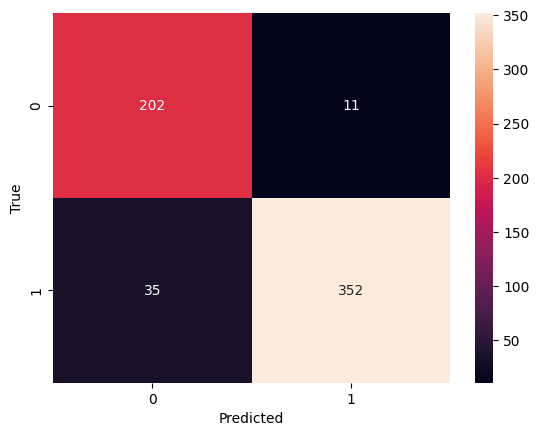

In [27]:
# Model
gnb = GaussianNB()
gnb.fit(X_train_standardized, y_train)
print(f'Gaussian Model Accuracy: {gnb.score(X_test_standardized, y_test)}\n')

# confusion matrix
cm = confusion_matrix(y_test, gnb.predict(X_test_standardized))
print(f'Confusion Matrix:\n{cm}')

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Multinomial Naive Bayes

Multinomial Model Accuracy: 0.885

Confusion Matrix:
[[183  30]
 [ 39 348]]


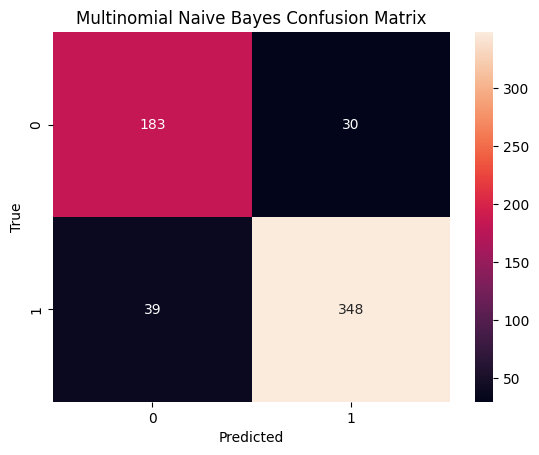

In [36]:
mnb = MultinomialNB()

mnb.fit(X_train_bins, y_train_bins)
print(f'Multinomial Model Accuracy: {mnb.score(X_test_bins, y_test_bins)}\n')

# confusion matrix
cm = confusion_matrix(y_test_bins, mnb.predict(X_test_bins))
print(f'Confusion Matrix:\n{cm}')

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

## Bernoulli Naive Bayes

Bernoulli Model Accuracy: 0.6666666666666666

Confusion Matrix:
[[ 14 199]
 [  1 386]]


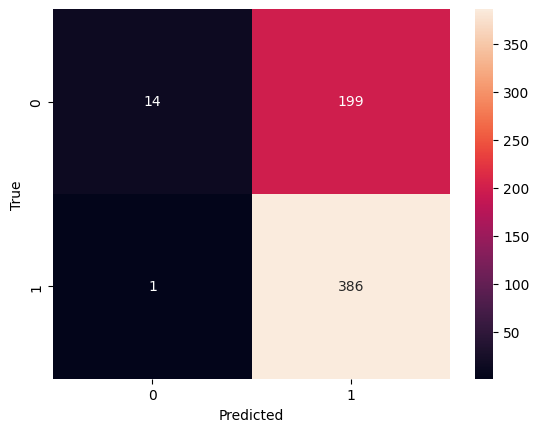

In [40]:
bnb = BernoulliNB()
bnb.fit(X_train_bins, y_train_bins)
print(f'Bernoulli Model Accuracy: {bnb.score(X_test_bins, y_test_bins)}\n')

# confusion matrix
cm = confusion_matrix(y_test_bins, bnb.predict(X_test_bins))
print(f'Confusion Matrix:\n{cm}')

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Categorical Naive Bayes

Categorical Model Accuracy: 0.9533333333333334

Confusion Matrix:
[[199  14]
 [ 14 373]]


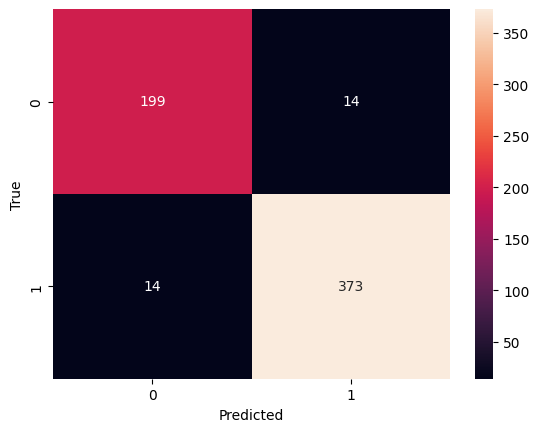

In [46]:
cnb = CategoricalNB()
cnb.fit(X_train_bins, y_train_bins)
print(f'Categorical Model Accuracy: {cnb.score(X_test_bins, y_test_bins)}\n')

# confusion matrix
cm = confusion_matrix(y_test_bins, cnb.predict(X_test_bins))
print(f'Confusion Matrix:\n{cm}')

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()